# To fit a continumm to the flux data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

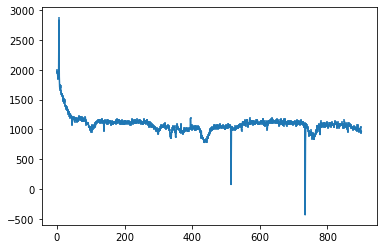

In [2]:
# importing the data
pix, fl, fle = np.loadtxt('sky_sub_2009oct30_0009.fits_flux.dat', usecols=(0,1,2), unpack=True)
# Let's look at the spectrum
plt.errorbar(pix, fl, yerr=fle)

In [3]:
# Let's now fit linear polynomial to it
aa = np.polyfit(pix, fl, deg=1, w=fle, cov=True)

In [4]:
print(aa[0])
print(aa[1])

[-2.70207091e-01  1.22959322e+03]
[[ 4.53067060e-04 -2.02315354e-01]
 [-2.02315354e-01  1.23805282e+02]]


In [5]:
def line(x, a0, a1):
    return a1*x+ a0

def qua(x, a0, a1, a2):
    return a2*x**2 + a1*x + a0

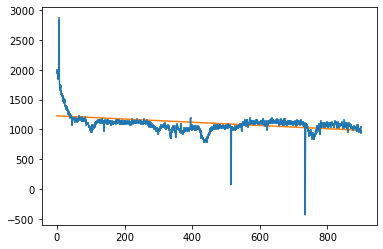

In [6]:
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, line(pix, aa[0][1], aa[0][0]))

In [7]:
# Now let's fit a quadratic model
bb = np.polyfit(pix, fl, deg=2, w=fle, cov=True)

In [8]:
print(bb[0])
print(bb[1])

[ 1.27766278e-03 -1.40812154e+00  1.38858991e+03]
[[ 6.85196414e-09 -6.10250930e-06  8.52681678e-04]
 [-6.10250930e-06  5.79349735e-03 -9.19489903e-01]
 [ 8.52681678e-04 -9.19489903e-01  2.04065966e+02]]


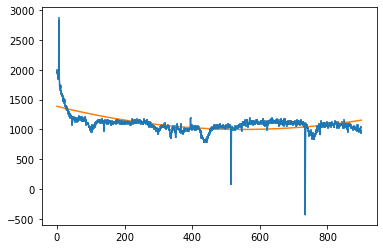

In [9]:
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, qua(pix, bb[0][2], bb[0][1], bb[0][0]))

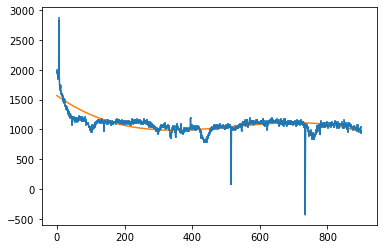

In [10]:
def fitting(datafile, deg):
    x, y, ye = np.loadtxt(datafile, usecols=(0,1,2), unpack=True)
    pp = np.polyfit(x, y, w=ye, deg=deg)
    return pp

data = 'sky_sub_2009oct30_0009.fits_flux.dat'
ab = fitting(data, 3)

plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, ab[0]*pix**3 + ab[1]*pix**2 + ab[2]*pix + ab[3])

In [11]:
aaa = np.array([1,2,3])
print(np.flip(aaa))

[3 2 1]


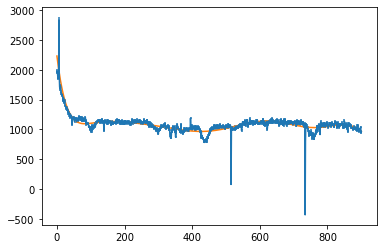

In [12]:
def arbi_poly(x, *params):
    return sum([p*(x**i) for i, p in enumerate(params)])

abc = np.flip(fitting(data, 10))
penta = arbi_poly(pix, *abc)
plt.errorbar(pix, fl, yerr=fle)
plt.plot(pix, penta)

In [13]:
def fit_poly(datafile, deg, plot=True):
    x, y, ye = np.loadtxt(datafile, usecols=(0,1,2), unpack=True)
    ab1 = np.polyfit(x, y, w=ye, deg=deg)
    ab2 = np.flip(ab1)
    polynom = arbi_poly(x, *ab2)
    if plot==True:
        plt.errorbar(x, y, yerr=ye)
        plt.plot(x, polynom)
    return ab1

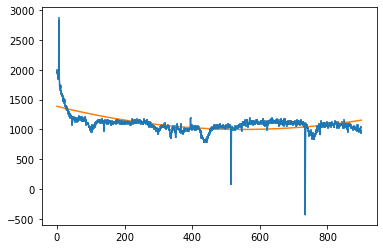

In [14]:
ab1 = fit_poly(data, 2)

In [15]:
a11 = np.array([1,2,3,4,5,6,7,8,9])
b11 = a11

b11[2:5]=0

In [16]:
print(a11)
print(b11)

[1 2 0 0 0 6 7 8 9]
[1 2 0 0 0 6 7 8 9]


In [17]:
a11 = np.array([1,2,3,4,5,6,7,8,9])
bb = np.copy(a11)

bb[2:5]=0

In [18]:
print(a11)
print(bb)

[1 2 3 4 5 6 7 8 9]
[1 2 0 0 0 6 7 8 9]


In [36]:
def fit_poly_norm(datafile, deg, selection, plot=True):
    x, y, ye = np.loadtxt(datafile, usecols=(0,1,2), unpack=True)
    we = np.copy(ye)
    for i in range(len(selection)):
        sel = selection[i].split(':')
        we[int(sel[0]):int(sel[1])] = 0
    ab1 = np.polyfit(x, y, w=we, deg=deg)
    ab2 = np.flip(ab1)
    polynom = arbi_poly(x, *ab2)
    if plot==True:
        plt.errorbar(x, y, yerr=ye)
        plt.plot(x, polynom)
    return ab1

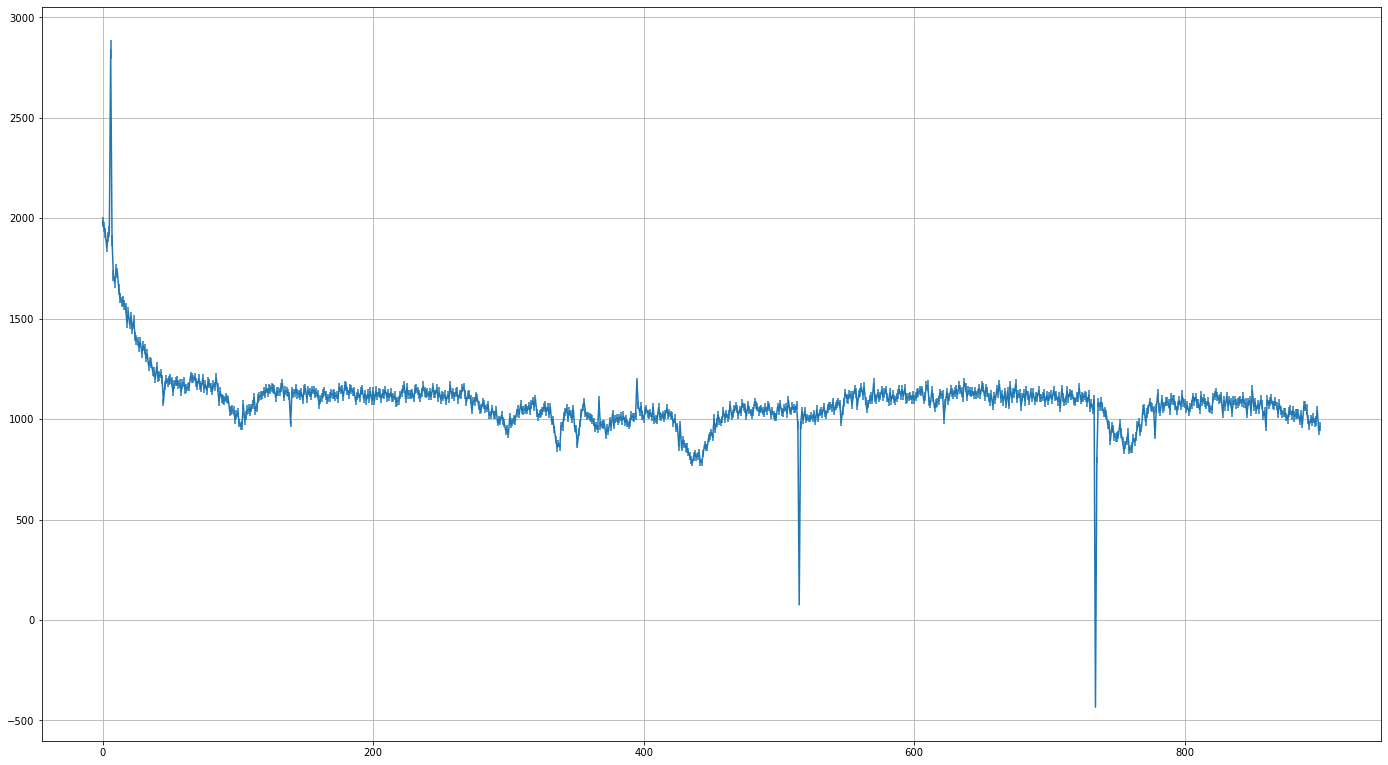

In [20]:
datafile1 = 'sky_sub_2009oct30_0009.fits_flux.dat'
pix1, fl1, fle1 = np.loadtxt(datafile1, usecols=(0,1,2), unpack=True)
plt.figure(figsize=(16*1.5, 9*1.5))
plt.errorbar(pix1, fl1, yerr=fle1)
plt.grid()

In [42]:
selection = ['81:130', '326:363', '730:780', '866:876', '888:894']
sel1 = selection[1].split(':')
print(float(sel1[0]))
print(float(sel1[1]))

326.0
363.0


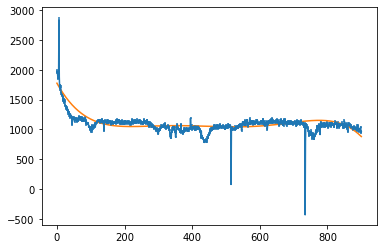

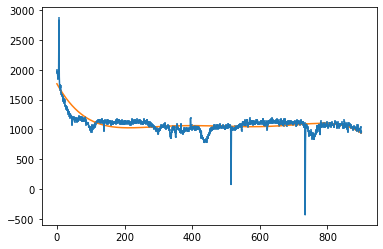

In [41]:
ab2 = fit_poly_norm(datafile1, 5, selection, plot=True)
plt.show()
ab3 = fit_poly(datafile1, 5)